In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime
warnings.filterwarnings("ignore")
# 显示最大列数
pd.set_option('max_columns',120)
# sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
# 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False

### 1.加载数据集

In [2]:
train = pd.read_csv('./data/train.csv')
testA = pd.read_csv("./data/testA.csv")
display(train.shape,testA.shape)

(800000, 47)

(200000, 46)

In [3]:
all_data = train.append(testA)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

### 2.数据预处理

#### 2.1 数据类型转换

In [4]:
# 把非数值类型变量转换为数值类型变量
not_number = []
number = []
for k,v in all_data.dtypes.items():
#     print(k,v)
    if not np.issubdtype(v,np.number):
        not_number.append(k)
    elif np.issubdtype(v,np.number):
        number.append(k)
print("非数值类型变量",not_number)
print("数值类型变量",number)

非数值类型变量 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
数值类型变量 ['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [5]:
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        # 数据量小于10，判定为离散性数据变量
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        # 连续性数据变量
        numerical_serial_fea.append(fea)
    return numerical_noserial_fea, numerical_serial_fea

numerical_noserial_fea, numerical_serial_fea = get_numerical_serial_fea(train,number)

In [6]:
print("离散型变量：",numerical_noserial_fea,"\n连续型变量：" ,numerical_serial_fea)

离散型变量： ['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12'] 
连续型变量： ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']


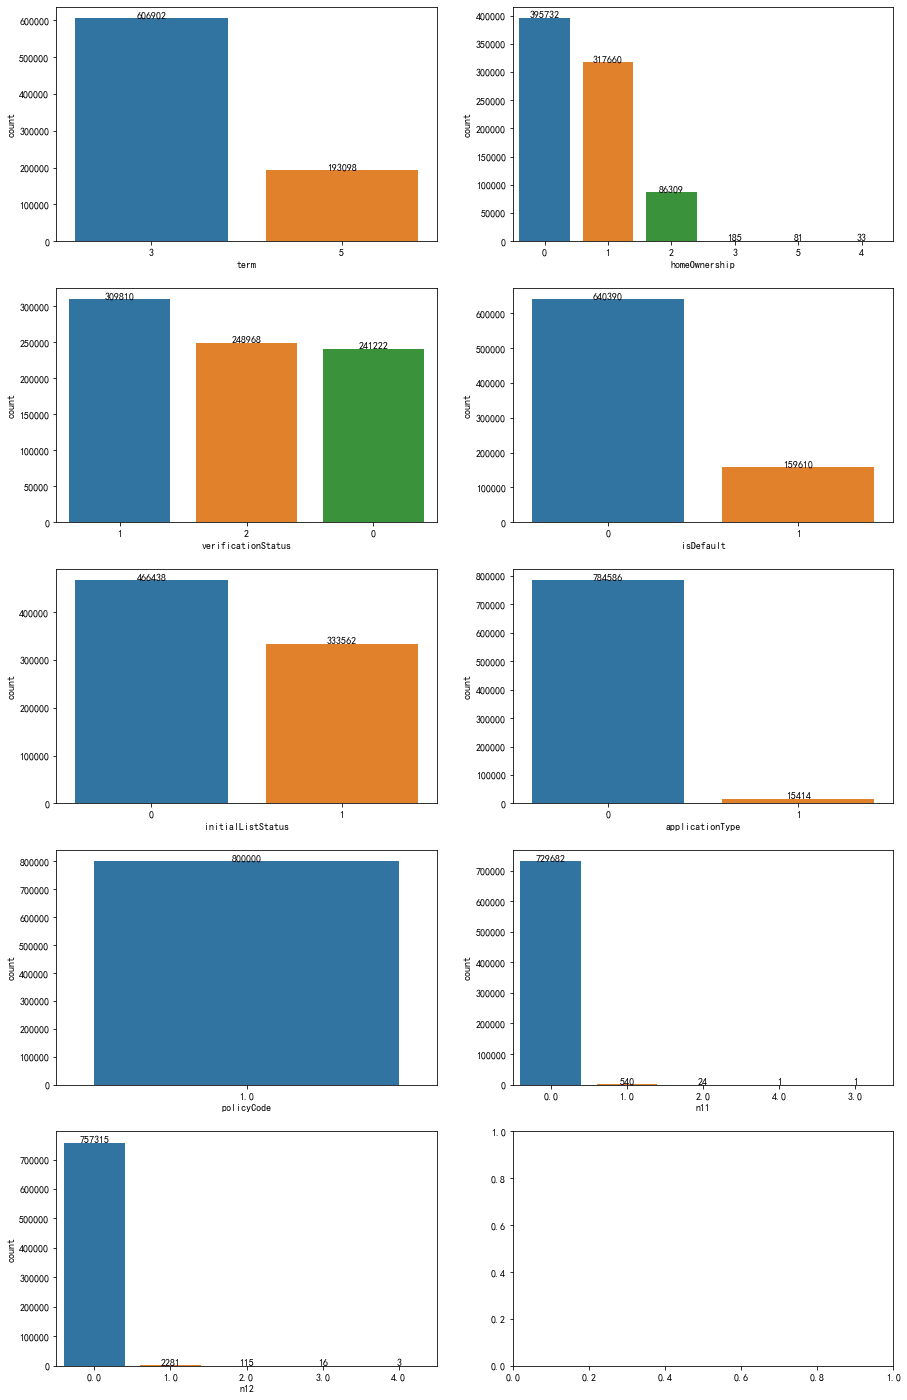

In [7]:
# 绘制离散性数据变量 用条形图来统计 连续型变量用数据分布图来展现
def plot_var(name_list,data):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    data : dataframe
    表结构
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
    # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
    
plot_var(numerical_noserial_fea,train)

#### 值的替换

In [187]:
# 非数值类型数据转化成数据类型数据
all_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [10]:
all_data['grade'].mode()

0    B
dtype: object

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

In [22]:
all_data['employmentLength'] = all_data['employmentLength'].fillna(value = all_data['employmentLength'].mode())

#### 日期转换

In [23]:
# issuedate 贷款发放的月份
all_data['issueDate'].value_counts().sort_values()

2007-06-01        1
2007-09-01       11
2008-09-01       24
2007-07-01       25
2007-08-01       27
              ...  
2014-10-01    26768
2015-12-01    28966
2015-07-01    30590
2015-10-01    31918
2016-03-01    36542
Name: issueDate, Length: 139, dtype: int64

In [24]:
# 将int类型转换为日期类型
# 日期减去起始日期 转换为多少天
all_data['issueDate'] = pd.to_datetime(all_data['issueDate'],format="%Y-%m-%d")
startdate = datetime.datetime.strptime("2007-06-01", "%Y-%m-%d")
all_data['issueDate'] = all_data['issueDate'].apply(lambda x:x-startdate).dt.days

In [25]:
# 借款人最早报告的信用额度开立的月份
all_data['earliesCreditLine'].value_counts().sort_values()

Mar-1957       1
Oct-2015       1
May-1960       1
Jul-1955       1
Oct-1957       1
            ... 
Sep-2004    6556
Oct-2001    6636
Sep-2003    6710
Aug-2002    6779
Aug-2001    6957
Name: earliesCreditLine, Length: 726, dtype: int64

In [26]:
# 将借款人最早报告的信用额度开立的月份 转换成对应的年份
all_data['earliesCreditLine'] = all_data['earliesCreditLine'].apply(lambda x:int(x[-4:]))

#### 2.2 缺失值的处理

In [27]:
miss = all_data.isnull().sum(axis=0)
miss = pd.concat([miss,miss * 100 / all_data.shape[0]],axis = 1)
miss.columns = ['miss_num','miss_rate']
miss.sort_values('miss_num',ascending=False,inplace=True)
miss 

,miss_num,miss_rate
isDefault,200000,20.0000
n11,87327,8.7327
employmentLength,58541,5.8541
n8,50382,5.0382
n14,50381,5.0381
n6,50381,5.0381
n1,50381,5.0381
n2,50381,5.0381
n3,50381,5.0381
n5,50381,5.0381


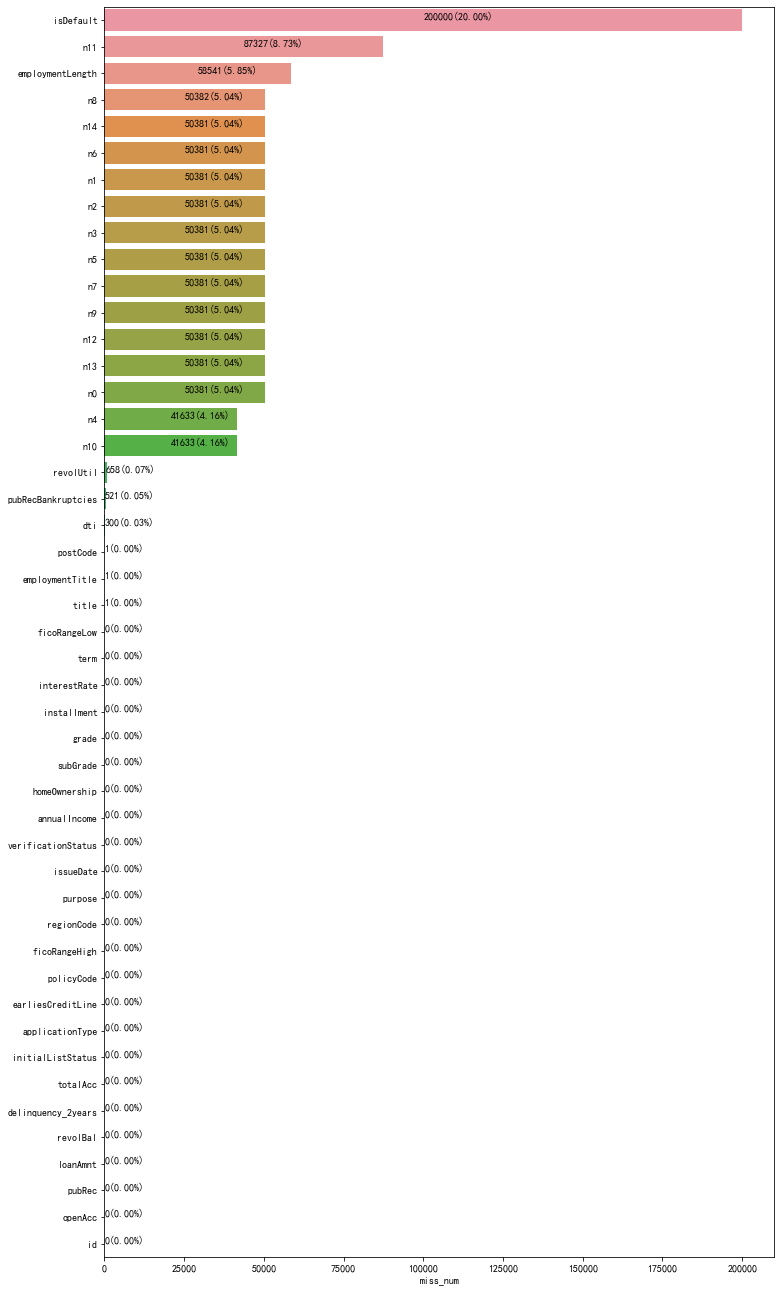

In [28]:
# 缺失值的可视化
ax = sns.barplot(y=miss.index,x=miss['miss_num'])
figsize = (12,miss.shape[0]//2)
ax.get_figure().set_size_inches(figsize)

for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")

#### 2.2.1 缺失值的填充

In [29]:
# 查找缺失率在0-10之间
missing_columns = miss[(miss['miss_rate']<10)&(miss['miss_rate']>0)].index.tolist()

In [30]:
# 不能使用inplace直接填充，需要重新赋值给原来的列
all_data[missing_columns] = all_data[missing_columns].fillna(all_data[missing_columns].median())

In [172]:
# # 使用for循环进行填充,不能一次性填充
# # for循环填充错误
# for column in missing_columns:
#     median = all_data[column].median()
#     all_data[column] = all_data[missing_columns].fillna(value=median)

In [40]:
map_dict = {
    "10+ years": 10, "9 years": 9, "8 years": 8,
"7 years": 7, "6 years": 6, "5 years": 5,
"4 years": 4, "3 years": 3, "2 years": 2,
"1 year": 1, "< 1 year": 0
}

all_data['employmentLength'] = all_data['employmentLength'].map(map_dict)

In [41]:
all_data['employmentLength'] = all_data['employmentLength'].fillna(value=all_data['employmentLength'].median())

In [42]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  float64
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  int64  
 13  isDefault           800000 non-null   float64
 14  purpose             1000000 non-null  int64  
 15  postCode        

### 3.EDA

In [173]:
# 对训练数据集进行探索性数据分析

#### 3.1 查看训练数据集的正负样本数量及比例

In [45]:
is_counts = train.isDefault.value_counts()

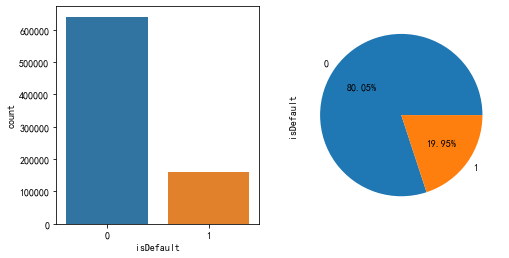

In [46]:
# 设置画布大小
plt.figure(figsize=(8,4))
ax = plt.subplot(1,2,1)
sns.countplot(x='isDefault',data = train,ax=ax)

ax = plt.subplot(1,2,2)
is_counts.plot(kind='pie',autopct = "%0.2f%%")

In [176]:
### 训练集和测试集合并一块进行数据预处理

### 4.特征工程

#### 4.1特征缩放

In [18]:
from sklearn.preprocessing import StandardScaler

In [47]:
all_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2.0,2,110000.0,2,2587,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5.0,0,46000.0,2,1888,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,2002,1723.0,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8.0,0,74000.0,2,3044,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10.0,1,118000.0,1,2983,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,6.0,1,29000.0,2,3196,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [20]:
all_data.describe()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,800000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,14420.845925,3.482534,13.239673,438.105739,2.647488,72091.367296,5.967523,0.614190,7.619750e+04,1.009832,2927.600845,0.199513,1.745668,258.480370,16.394772,18.285702,0.317770,696.196545,700.196687,11.594484,0.215038,0.134319,1.623413e+04,51.807870,24.983451,0.416892,0.019307,1998.688632,1758.925232,1.0,0.485368,3.611066,5.611124,5.611124,4.704421,8.049467,8.487354,8.216776,14.535059,5.563252,11.613830,0.000747,0.003258,0.084669,2.169932
std,288675.278932,8720.358533,0.855704,4.765909,261.617903,1.137631,106647.109305,3.580976,0.675692,7.077646e+04,0.782519,591.314176,0.399634,2.367460,199.980271,11.041613,11.218044,0.879524,31.863308,31.863973,5.471342,0.606479,0.378026,2.245257e+04,24.516019,11.988140,0.493045,0.137602,7.606231,7949.844432,0.0,1.300524,2.196149,3.222736,3.222736,2.893479,4.683882,7.200994,4.452022,7.922227,3.137737,5.366449,0.028817,0.060905,0.495704,1.797276
min,0.000000,500.000000,3.000000,5.310000,14.010000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,625.000000,629.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1944.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,8000.000000,3.000000,9.750000,248.480000,2.000000,427.000000,3.000000,0.000000,4.567103e+04,0.000000,2587.000000,0.000000,0.000000,103.000000,8.000000,11.800000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.943000e+03,33.500000,16.000000,0.000000,0.000000,1995.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,499999.500000,12000.000000,3.000000,12.740000,375.380000,3.000000,7782.000000,6.000000,1.000000,6.500000e+04,1.000000,2983.000000,0.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113300e+04,52.200000,23.000000,0.000000,0.000000,2000.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,749999.250000,20000.000000,3.000000,15.990000,580.730000,3.000000,118112.000000,10.000000,1.000000,9.000000e+04,2.000000,3318.000000,0.000000,4.000000,394.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.974300e+04,70.700000,32.000000,1.000000,0.000000,2004.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,10.000000,11.000000,10.000000,18.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,5.000000,378351.000000,10.000000,5.000000,1.099920e+07,2.000000,4201.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845

In [48]:
## employmentTitle 就业职称
scaler = StandardScaler()
columns = ['title','earliesCreditLine','loanAmnt','installment','annualIncome','employmentTitle']
all_data[columns] = scaler.fit_transform(all_data[columns])

<IPython.core.display.Javascript object>

#### 4.1.1训练集与测试集分开

In [115]:
train_data = all_data[:800000]
testA_data = all_data[800000:]

#### 4.2 特征选择

In [224]:
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,2.359899,5,19.52,1.834219,5.0,E2,-0.672980,2.0,2,0.477596,2,2587,1.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,0.303878,-0.221127,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,0.410437,5,18.49,0.090950,4.0,D2,1.385426,5.0,0,-0.426660,2,1888,0.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,0.435350,-0.004519,1.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,0.0,0.0,2.0
2,2,-0.277609,5,16.99,-0.534886,4.0,D3,-0.378757,8.0,0,-0.031048,2,3044,0.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,0.961234,-0.221253,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,-0.392283,3,7.26,-0.371327,1.0,A4,-0.236644,10.0,1,0.590628,1,2983,0.0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,0.040936,-0.220750,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,-1.309677,3,12.99,-1.288275,3.0,C2,-0.675475,6.0,1,-0.666853,2,3196,0.0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,-2.851431,-0.219869,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [37]:
# 对特征重要性进行排序
target = train_data.isDefault.copy()
data = train_data.drop(['isDefault','id','subGrade'],axis=1).copy()

In [26]:
# 使用gbdt对数据集的特征重要性进行排序
gbdt = GradientBoostingClassifier()
%time gbdt.fit(data,target)

<IPython.core.display.Javascript object>

Wall time: 8min 33s


GradientBoostingClassifier()

In [27]:
importances = gbdt.feature_importances_
len(importances)

44

In [28]:
np.argsort(importances)  # 升序排列
print(data.columns[np.argsort(importances)])
print(importances[np.argsort(importances)])

Index(['n4', 'title', 'initialListStatus', 'n13', 'pubRec', 'openAcc',
       'policyCode', 'purpose', 'n0', 'n11', 'n10', 'n12', 'n1', 'n5', 'n7',
       'pubRecBankruptcies', 'applicationType', 'revolUtil', 'postCode', 'n9',
       'delinquency_2years', 'n8', 'n6', 'regionCode', 'employmentLength',
       'earliesCreditLine', 'totalAcc', 'verificationStatus', 'n3', 'loanAmnt',
       'n14', 'revolBal', 'n2', 'ficoRangeHigh', 'ficoRangeLow',
       'employmentTitle', 'installment', 'annualIncome', 'dti',
       'homeOwnership', 'term', 'issueDate', 'interestRate', 'grade'],
      dtype='object')
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00681752e-05 2.81109685e-05 3.33089676e-05 1.85313950e-04
 2.31729505e-04 2.63508728e-04 4.02470881e-04 6.36468543e-04
 7.40041329e-04 7.56808762e-04 7.59815437e-04 1.53671927e-03
 1.73027277e-03 2.13903830e-03

In [29]:
# 特征重要性降序排列
print(data.columns[np.argsort(importances)][::-1])
print(importances[np.argsort(importances)][::-1])

Index(['grade', 'interestRate', 'issueDate', 'term', 'homeOwnership', 'dti',
       'annualIncome', 'installment', 'employmentTitle', 'ficoRangeLow',
       'ficoRangeHigh', 'n2', 'revolBal', 'n14', 'loanAmnt', 'n3',
       'verificationStatus', 'totalAcc', 'earliesCreditLine',
       'employmentLength', 'regionCode', 'n6', 'n8', 'delinquency_2years',
       'n9', 'postCode', 'revolUtil', 'applicationType', 'pubRecBankruptcies',
       'n7', 'n5', 'n1', 'n12', 'n10', 'n11', 'n0', 'purpose', 'policyCode',
       'openAcc', 'pubRec', 'n13', 'initialListStatus', 'title', 'n4'],
      dtype='object')
[2.98612898e-01 2.91960061e-01 1.01150603e-01 8.97244736e-02
 4.34368107e-02 3.15063921e-02 2.19592566e-02 1.50904907e-02
 1.43785209e-02 1.33330133e-02 1.28192106e-02 1.23951559e-02
 1.11488703e-02 9.84663643e-03 9.05025186e-03 6.26044021e-03
 4.36635201e-03 3.50688725e-03 2.13903830e-03 1.73027277e-03
 1.53671927e-03 7.59815437e-04 7.56808762e-04 7.40041329e-04
 6.36468543e-04 4.02470881e-04

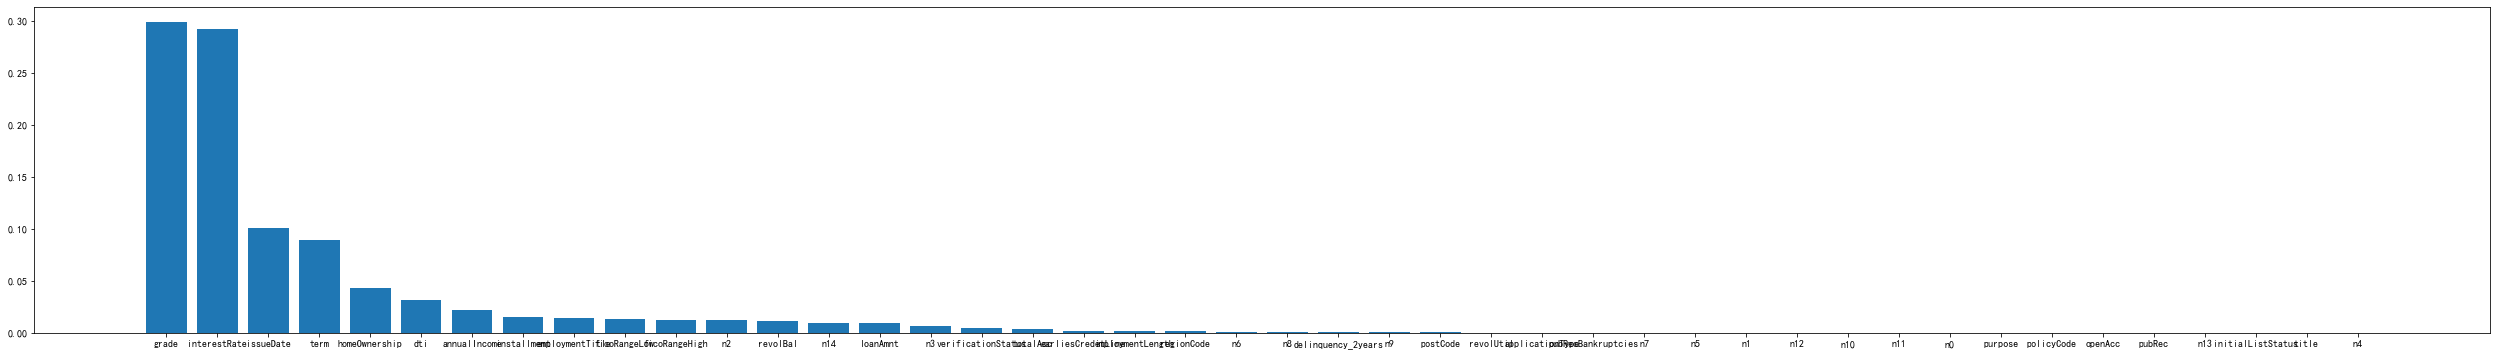

In [30]:
# 画图
plt.figure(figsize=(len(data.columns), 6))

plt.bar(np.arange(44), importances[np.argsort(importances)][::-1]) 
_ = plt.xticks(np.arange(44),data.columns[np.argsort(importances)][::-1] )

In [38]:
# 保留重要性较高的特征
new_columns = data.columns[np.argsort(importances)][::-1][:15]
data = data[new_columns]
data.head()

,grade,interestRate,issueDate,term,homeOwnership,dti,annualIncome,installment,employmentTitle,ficoRangeLow,ficoRangeHigh,n2,revolBal,n14,loanAmnt
0,5.0,19.52,2587,5,2,17.05,0.477596,1.834219,-0.672980,730.0,734.0,2.0,24178.0,2.0,2.359899
1,4.0,18.49,1888,5,0,27.83,-0.426660,0.090950,1.385426,700.0,704.0,5.0,15096.0,2.0,0.410437
2,4.0,16.99,3044,5,0,22.77,-0.031048,-0.534886,-0.378757,675.0,679.0,3.0,4606.0,4.0,-0.277609
3,1.0,7.26,2983,3,1,17.21,0.590628,-0.371327,-0.236644,685.0,689.0,6.0,9948.0,1.0,-0.392283
4,3.0,12.99,3196,3,1,32.16,-0.666853,-1.288275,-0.675475,690.0,694.0,7.0,2942.0,4.0,-1.309677


### 5.数据不平衡性处理

### 6.模型选择和训练

In [107]:
columns = train_data.columns.tolist()

In [62]:
new_columns = ['grade', 'subGrade','interestRate', 'issueDate', 'term', 'homeOwnership', 'dti',
       'annualIncome', 'installment', 'employmentTitle', 'ficoRangeLow',
       'ficoRangeHigh', 'n2', 'revolBal', 'n14', 'loanAmnt', 'n3',
       'verificationStatus', 'totalAcc', 'earliesCreditLine',
       'employmentLength']

not_number = ['grade', 'subGrade', 'employmentLength']
numerical_noserial_fea = numerical_noserial_fea + ['grade','subGrade']

numerical_noserial_fea,numerical_serial_fea = get_numerical_serial_fea(train_data,new_columns)

In [80]:
categorical_features = numerical_noserial_fea + ['subGrade']
categorical_features

['grade', 'term', 'homeOwnership', 'verificationStatus', 'subGrade']

In [116]:
# 训练集和结果集
data = train_data.drop(columns=['id','isDefault'],axis=1)
target = train_data['isDefault']

In [79]:
data[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   grade               800000 non-null  object 
 1   term                800000 non-null  int64  
 2   homeOwnership       800000 non-null  int64  
 3   verificationStatus  800000 non-null  int64  
 4   subGrade            800000 non-null  object 
 5   employmentLength    800000 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 42.7+ MB


In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [118]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, depth=5,cat_features=categorical_features,learning_rate=0.5, loss_function='Logloss',
                            logging_level='Verbose')

In [119]:
model.fit(X_train,y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5107836	test: 0.5113933	best: 0.5113933 (0)	total: 439ms	remaining: 43.4s
1:	learn: 0.4730522	test: 0.4738991	best: 0.4738991 (1)	total: 939ms	remaining: 46s
2:	learn: 0.4600050	test: 0.4608688	best: 0.4608688 (2)	total: 1.46s	remaining: 47.1s
3:	learn: 0.4551787	test: 0.4560887	best: 0.4560887 (3)	total: 1.83s	remaining: 43.9s
4:	learn: 0.4527276	test: 0.4536041	best: 0.4536041 (4)	total: 2.16s	remaining: 41.1s
5:	learn: 0.4518319	test: 0.4527209	best: 0.4527209 (5)	total: 2.5s	remaining: 39.2s
6:	learn: 0.4508822	test: 0.4518482	best: 0.4518482 (6)	total: 2.8s	remaining: 37.3s
7:	learn: 0.4500099	test: 0.4510347	best: 0.4510347 (7)	total: 3.14s	remaining: 36.1s
8:	learn: 0.4494979	test: 0.4506285	best: 0.4506285 (8)	total: 3.5s	remaining: 35.4s
9:	learn: 0.4490816	test: 0.4503096	best: 0.4503096 (9)	total: 3.81s	remaining: 34.3s
10:	learn: 0.4487993	test: 0.4500147	best: 0.4500147 (10)	total: 4.13s	remaining: 33.4s
11:	learn: 0.4483107	test: 0.4494802	best: 0.4494802 (11)

94:	learn: 0.4391932	test: 0.4428060	best: 0.4428060 (94)	total: 33.4s	remaining: 1.76s
95:	learn: 0.4391279	test: 0.4428080	best: 0.4428060 (94)	total: 33.7s	remaining: 1.4s
96:	learn: 0.4390765	test: 0.4427779	best: 0.4427779 (96)	total: 34.1s	remaining: 1.05s
97:	learn: 0.4389947	test: 0.4427050	best: 0.4427050 (97)	total: 34.4s	remaining: 701ms
98:	learn: 0.4389375	test: 0.4427090	best: 0.4427050 (97)	total: 34.8s	remaining: 351ms
99:	learn: 0.4388953	test: 0.4427208	best: 0.4427050 (97)	total: 35.1s	remaining: 0us

bestTest = 0.442704979
bestIteration = 97

Shrink model to first 98 iterations.


In [120]:
model.score(X_train,y_train)

0.8080171875

In [121]:
model.score(X_test,y_test)

0.80678125

<BarContainer object of 45 artists>

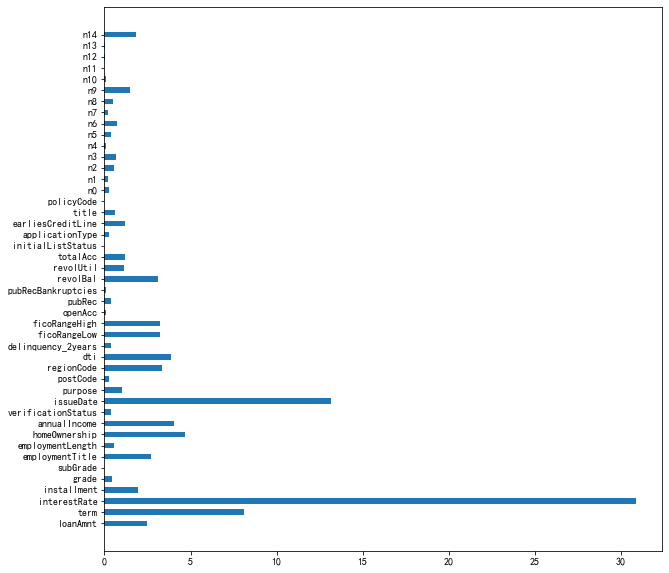

In [122]:
fea_ = model.feature_importances_
fea_name = model.feature_names_
plt.figure(figsize=(10, 10))
plt.barh(fea_name,fea_,height =0.5)

#### 6.1尝试使用新的模型进行调参

#### catboost的使用

### 7.网格搜索进行调参

In [51]:
from sklearn.model_selection import GridSearchCV

In [58]:
lr = LogisticRegression()
param_grid = {
    'C':[0.1,1,10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gv = GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=8)
%time gv.fit(X_train, y_train)

Wall time: 29min 45s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [60]:
gv.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [61]:
gv.score(X_train,y_train)

0.6797098252627305

In [62]:
gv.score(X_test,y_test)

0.6799138025265854

In [63]:
gv.best_estimator_.score(X_test,y_test)

0.6799138025265854

### 8.进行评估

### 9.导出测试集的结果

In [123]:
testA = testA_data.drop(columns=['id'])
y_testA = model.predict(testA)

In [124]:
result = testA_data[['id']]
result['isDefault'] = y_testA

In [127]:
result.to_csv('result_catboost.csv')

In [125]:
is_counts = result['isDefault'].value_counts()

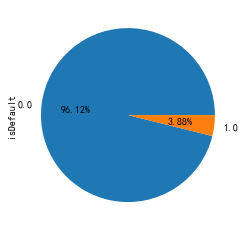

In [126]:
is_counts.plot(kind='pie', autopct = '%0.2f%%')